In [1]:
from load_dataset import load_dataset
from describe_dataset import describe
import matplotlib.pyplot as plt
import numpy as np
from d3rlpy.dataset import MDPDataset

In [2]:
buffer_1 = load_dataset("data/buffer_1.pkl")
buffer1_returns = np.array([e.compute_return() for e in buffer_1.episodes])

# Generate sub-buffers according to trajectories quality

Text(0.5, 0, 'Return')

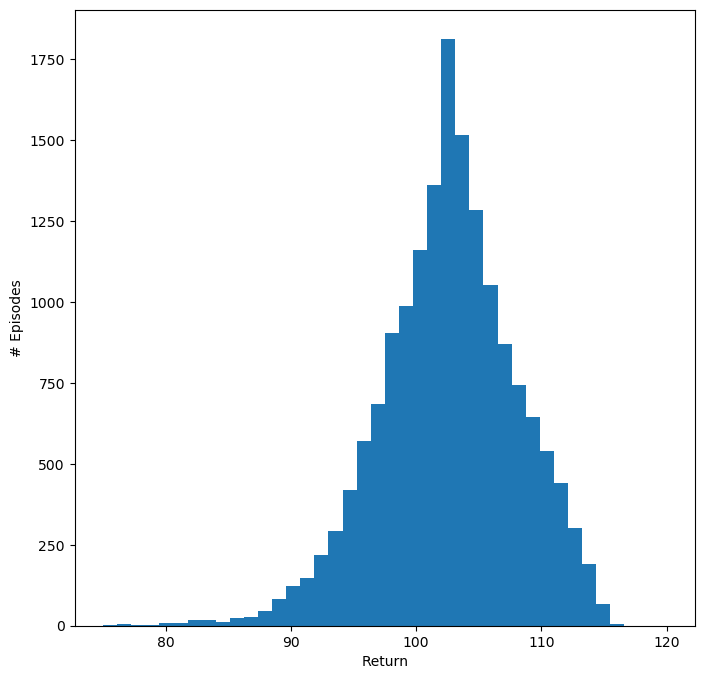

In [38]:
plt.figure(figsize=(8, 8))
plt.hist(buffer1_returns, bins=40, range=(75, 120))
plt.ylabel("# Episodes")
plt.xlabel("Return")

Total returns > 0: 16604
Total returns < 0: 172


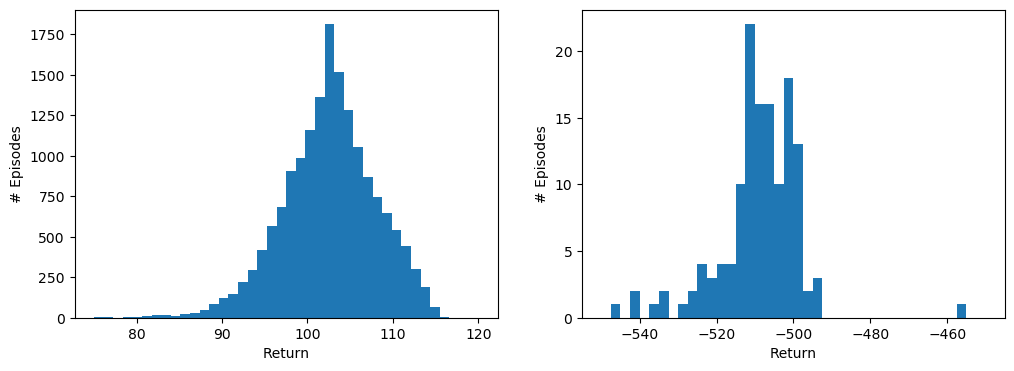

In [33]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
axs[0].hist(buffer1_returns, bins=40, range=(75, 120))
axs[1].hist(buffer1_returns, bins=40, range=(-550, -450))
for ax in axs:
    ax.set_xlabel("Return")
    ax.set_ylabel("# Episodes")
print(f"Total returns > 0:", np.sum(buffer1_returns > 0))
print(f"Total returns < 0:", np.sum(buffer1_returns < 0))

Buffer A
# Episodes: 4194
Return: 96.57198333740234
Total returns > 0: 4150
Total returns < 0: 44
Buffer B
# Episodes: 8388
Return: 95.9389877319336
Total returns > 0: 8294
Total returns < 0: 94
Buffer C
# Episodes: 12582
Return: 97.21469116210938
Total returns > 0: 12466
Total returns < 0: 116
Buffer D
# Episodes: 16776
Return: 96.17417907714844
Total returns > 0: 16591
Total returns < 0: 185


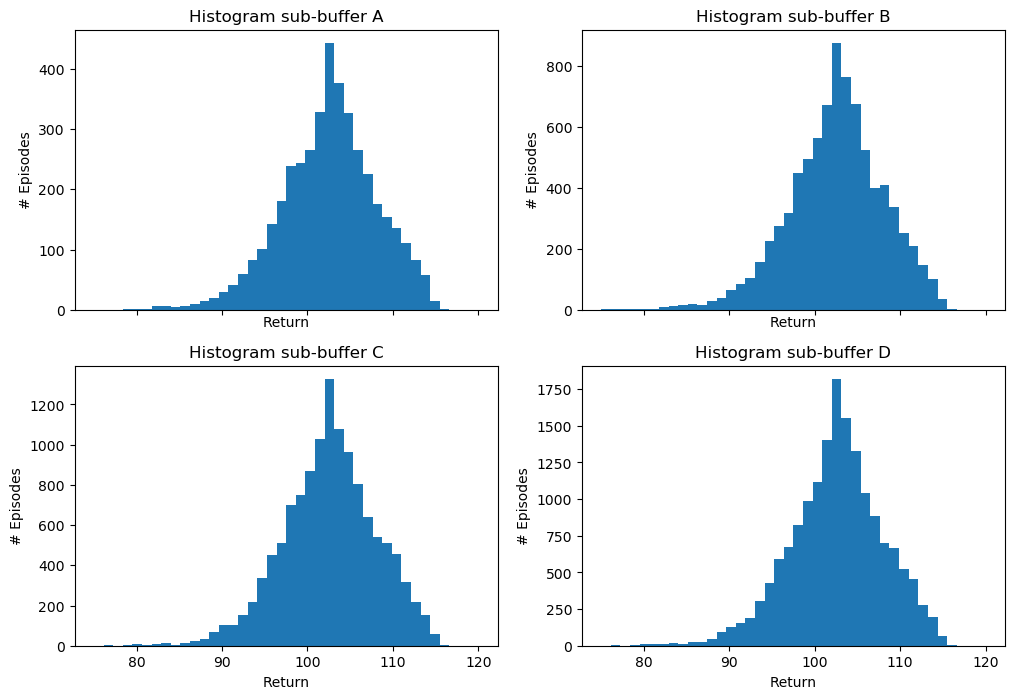

In [50]:
buffers = {
    "A": {
        "size": 0.25,
        "episodes": []
    },
    "B": {
        "size": 0.50,
        "episodes": []
    },
    "C": {
        "size": 0.75,
        "episodes": []
    },
    "D": {
        "size": 1.0,
        "episodes": []
    }
}
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12, 8), sharex='col')
axs = axs.reshape(-1)   # type: ignore
source_idxs = np.arange(len(buffer_1))
for i, (buffer_name, buffer_data) in enumerate(buffers.items()):
    print(f"Buffer {buffer_name}")
    
    # sample episodes
    sampled_idxs = np.random.choice(source_idxs, size=(int(buffer_data["size"]*len(source_idxs))))
    subbuffer_returns = buffer1_returns[sampled_idxs]
    print(f"# Episodes: {len(sampled_idxs)}")
    print(f"Return: {np.mean(subbuffer_returns)}")
    print(f"Total returns > 0:", np.sum(subbuffer_returns > 0))
    print(f"Total returns < 0:", np.sum(subbuffer_returns < 0))
    for idx in sampled_idxs:
        buffer_data["episodes"].append(buffer_1[idx])

    # plot histograms
    axs[i].hist(subbuffer_returns, bins=40, range=(75, 120))
    axs[i].set_xlabel("Return")
    axs[i].set_ylabel("# Episodes")
    axs[i].set_title(f"Histogram sub-buffer {buffer_name}")
    

In [51]:
# describe
for buffer_name, buffer_data in buffers.items():
    buffer_returns = np.array([e.compute_return() for e in buffer_data["episodes"]])
    avg_return = np.mean(buffer_returns)
    print(f"Buffer {buffer_name} between {min(buffer_returns):.2f} to {max(buffer_returns):.2f} contains {len(buffer_data['episodes'])} ({100 * len(buffer_data['episodes'])/len(buffer_1) :.2f}%) episodes with average return {avg_return:.2f}")

Buffer A between -565.01 to 115.73 contains 4194 (25.00%) episodes with average return 96.57
Buffer B between -774.12 to 115.77 contains 8388 (50.00%) episodes with average return 95.94
Buffer C between -774.12 to 116.06 contains 12582 (75.00%) episodes with average return 97.21
Buffer D between -802.02 to 116.06 contains 16776 (100.00%) episodes with average return 96.17


In [52]:

for buffer_name, buffer_data in buffers.items():
    print(f"Generating subuffer {buffer_name}")
    observations = []
    rewards = []
    actions = []
    terminals = []
    for i, episode in enumerate(buffer_data["episodes"]):
        observations.append(episode.observations)
        rewards.append(episode.rewards)
        actions.append(episode.actions)
        term_array = np.zeros(shape=(len(episode.rewards)))
        term_array[-1] = episode.terminal
        terminals.append(term_array)
    subbuffer = MDPDataset(observations=np.concatenate(observations),
                           actions=np.concatenate(actions), 
                           rewards=np.concatenate(rewards), 
                           terminals=np.concatenate(terminals))
    subbuffer_returns = np.array([e.compute_return() for e in subbuffer])
    avg_return = np.mean(subbuffer_returns)
    output_name = f"data/buffer_1_subbuffer_{buffer_name}.h5"
    subbuffer.dump(output_name)
    print(f"Avg return: {avg_return:.2f}. Exported to {output_name}")

Generating subuffer A
Avg return: 96.57. Exported to data/buffer_1_subbuffer_A.h5
Generating subuffer B
Avg return: 95.94. Exported to data/buffer_1_subbuffer_B.h5
Generating subuffer C
Avg return: 97.21. Exported to data/buffer_1_subbuffer_C.h5
Generating subuffer D
Avg return: 96.17. Exported to data/buffer_1_subbuffer_D.h5
